In [92]:
from shapely.geometry import Point
import seaborn as sns
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [93]:
case_count_df=pd.read_csv('data/covid_count.csv')
case_count_df['date']=pd.to_datetime(case_count_df['Specimen Collection Date'])
cases_by_zip=case_count_df.groupby(['Zip']).sum()
cases_by_zip['ZIP'] = cases_by_zip.index
cases_by_zip['ZIP'] = cases_by_zip.loc[:, ['ZIP']].astype(float)
cases_zip_ord=cases_by_zip.sort_values(by=['Cases'], ascending=False)
cases_zip_ord.head(5)

,Cases,ZIP
Zip,,
37013.0,13354,37013.0
37211.0,10233,37211.0
37209.0,5072,37209.0
37207.0,4729,37207.0
37115.0,4574,37115.0


In [94]:
top_5_z=cases_zip_ord.head(5)

In [95]:
case_count_dfff=case_count_df[case_count_df['Zip'].isin(top_5_z.ZIP)]
case_count_dfff

,Specimen Collection Date,Zip,Cases,date
2,3/11/2020,37013.0,1,2020-03-11
10,3/12/2020,37013.0,1,2020-03-12
12,3/12/2020,37211.0,1,2020-03-12
18,3/13/2020,37013.0,1,2020-03-13
24,3/13/2020,37211.0,1,2020-03-13
...,...,...,...,...
8819,3/27/2021,37013.0,1,2021-03-27
8821,3/27/2021,37115.0,1,2021-03-27
8824,3/27/2021,37207.0,2,2021-03-27
8826,3/27/2021,37209.0,2,2021-03-27


In [96]:
cases_zip_ord

,Cases,ZIP
Zip,,
37013.0,13354,37013.0
37211.0,10233,37211.0
37209.0,5072,37209.0
37207.0,4729,37207.0
37115.0,4574,37115.0
37076.0,4279,37076.0
37221.0,3910,37221.0
37217.0,3907,37217.0
37214.0,3508,37214.0


In [97]:
case_count_df.Zip.unique()

array([37217., 37214., 37013., 37204., 37205., 37210., 37212., 37215.,
          nan, 37211., 37220., 37138., 37203., 37206., 37219., 37221.,
       37027., 37208., 37115., 37209., 37216., 37076., 37207., 37072.,
       37189., 37218., 37201., 37228., 37080., 37213., 37238., 37069.])

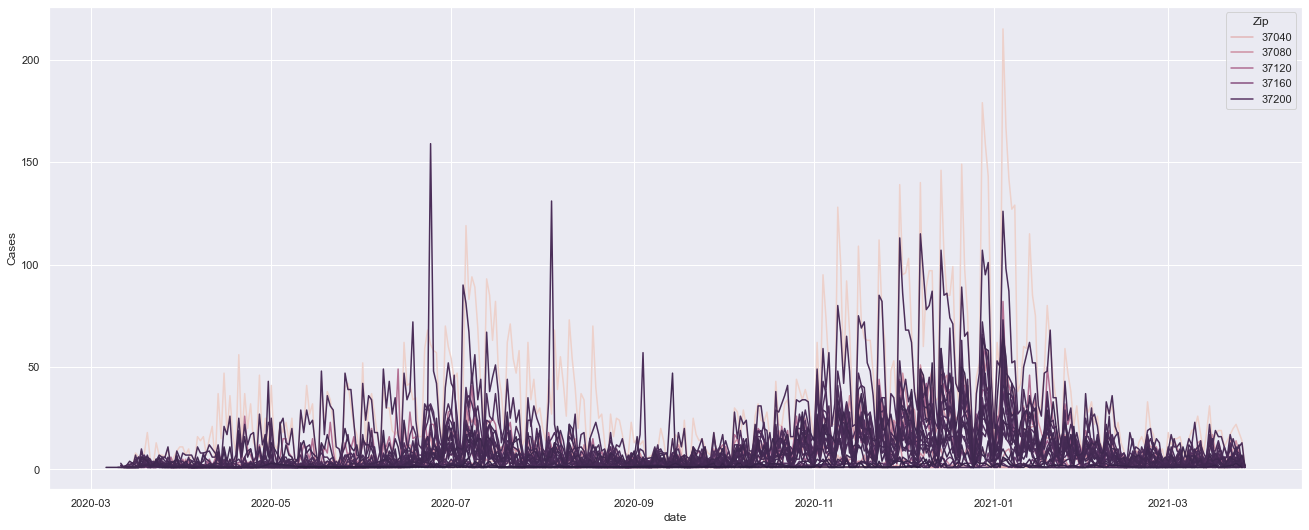

In [98]:
sns.set_palette("Paired")
sns.lineplot(data=case_count_df, x="date", y="Cases", hue='Zip')
rcParams['figure.figsize'] = 20,8.27

In [3]:
case_count_df

,Specimen Collection Date,Zip,Cases,date
0,3/6/2020,37217.0,1,2020-03-06
1,3/10/2020,37214.0,1,2020-03-10
2,3/11/2020,37013.0,1,2020-03-11
3,3/11/2020,37204.0,2,2020-03-11
4,3/11/2020,37205.0,1,2020-03-11
...,...,...,...,...
8827,3/27/2021,37210.0,1,2021-03-27
8828,3/27/2021,37211.0,1,2021-03-27
8829,3/27/2021,37212.0,1,2021-03-27
8830,3/27/2021,37214.0,2,2021-03-27


In [4]:
#GB=case_count_df.groupby([(case_count_df.date.year),(case_count_df.date.month)]).sum()

result = case_count_df.groupby([case_count_df['date'].dt.year, 
                                case_count_df['date'].dt.month,
                                case_count_df['Zip']]).agg({'Cases':sum})
result

Cases
date date Zip           
2020 3    37013.0    128
          37027.0      8
          37072.0     11
          37076.0     23
          37080.0      1
...                  ...
2021 3    37218.0     44
          37219.0     12
          37220.0     26
          37221.0    120
          37228.0     15

[384 rows x 1 columns]

In [25]:
rdf = pd.DataFrame(data=result)
rdf

Cases
date date Zip           
2020 3    37013.0    128
          37027.0      8
          37072.0     11
          37076.0     23
          37080.0      1
...                  ...
2021 3    37218.0     44
          37219.0     12
          37220.0     26
          37221.0    120
          37228.0     15

[384 rows x 1 columns]

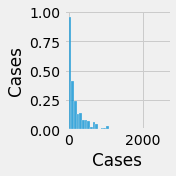

In [22]:
sns.pairplot(rdf)

In [6]:
plt.style.use('fivethirtyeight')

x = np.linspace(0, 10)

# Fixing random state for reproducibility
np.random.seed(19680801)

fig, ax = plt.subplots()

ax.plot(x, np.sin(x) + x + np.random.randn(50))
ax.plot(x, np.sin(x) + 0.5 * x + np.random.randn(50))
ax.plot(x, np.sin(x) + 2 * x + np.random.randn(50))
ax.plot(x, np.sin(x) - 0.5 * x + np.random.randn(50))
ax.plot(x, np.sin(x) - 2 * x + np.random.randn(50))
ax.plot(x, np.sin(x) + np.random.randn(50))
ax.set_title("'fivethirtyeight' style sheet")

plt.show()

NameError: name 'np' is not defined

In [7]:
vaccine_count_df=pd.read_csv('data/vaccine_with_protocol.csv')
shots_by_zip=vaccine_count_df.groupby(['zipcode']).sum()
shots_by_zip['ZIP'] = shots_by_zip.index
shots_by_zip['ZIP'] = shots_by_zip.loc[:, ['ZIP']].astype(float)
shots_zip_ord=shots_by_zip.sort_values(by=['count_given'], ascending=False)
shots_zip_ord.head(5)

,count_given,dose_nbr,ZIP
zipcode,,,
37211.0,28477.0,340.0,37211.0
37221.0,27622.0,339.0,37221.0
37013.0,27167.0,329.0,37013.0
37205.0,24451.0,342.0,37205.0
37209.0,20553.0,342.0,37209.0


In [24]:
vaccine_count_df.head(15)

,vacc_date,zipcode,count_given,dose_nbr,protocol
0,2020-12-12,37215.0,1.0,1.0,two-shot
1,2020-12-14,37205.0,1.0,2.0,two-shot
2,2020-12-14,37215.0,1.0,1.0,two-shot
3,2020-12-15,37221.0,1.0,1.0,two-shot
4,2020-12-16,37215.0,1.0,1.0,two-shot
5,2020-12-17,37013.0,16.0,1.0,two-shot
6,2020-12-17,37072.0,8.0,1.0,two-shot
7,2020-12-17,37076.0,5.0,1.0,two-shot
8,2020-12-17,37080.0,2.0,1.0,two-shot
9,2020-12-17,37115.0,1.0,1.0,two-shot


In [8]:
zipcodes = gpd.read_file('../geospatial-python-workshop/data/zipcodes.geojson')
zipcodes['zip'] = zipcodes.loc[:, ['zip']].astype(float)


In [9]:
case_zip_map = pd.merge(left = zipcodes, right = cases_by_zip, 
                    left_on = 'zip', right_on = 'ZIP')
case_zip_map.head()

,zip,objectid,po_name,shape_stlength,shape_starea,geometry,Cases,ZIP
0,37115.0,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ...",4574,37115.0
1,37216.0,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ...",2011,37216.0
2,37204.0,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ...",1786,37204.0
3,37027.0,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ...",231,37027.0
4,37027.0,31,BRENTWOOD,3116.4327152718852,304596.06201171875,"MULTIPOLYGON (((-86.72012 36.00886, -86.72012 ...",231,37027.0


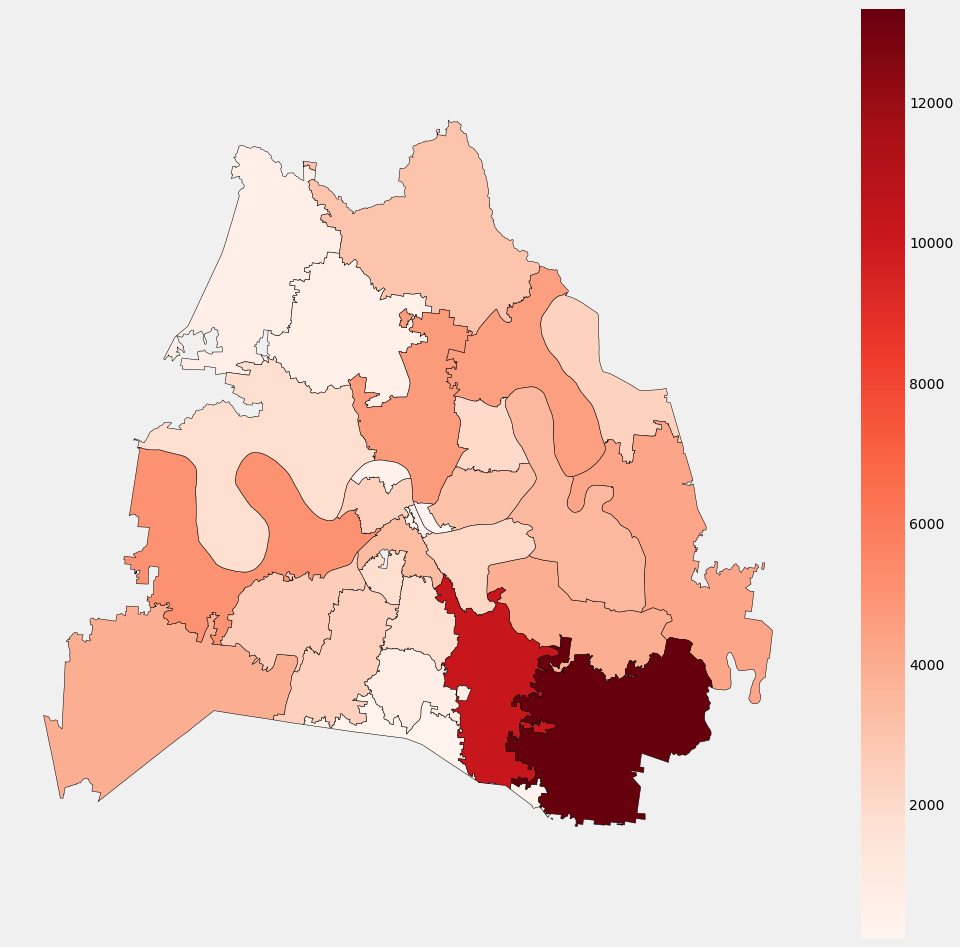

In [10]:
fig, ax = plt.subplots(figsize=(16,16))
case_zip_map.plot(column = 'Cases',
                  cmap=plt.cm.get_cmap('Reds'),
                  edgecolor = 'black',
                  legend=True,
                  ax = ax)
ax.axis('off');

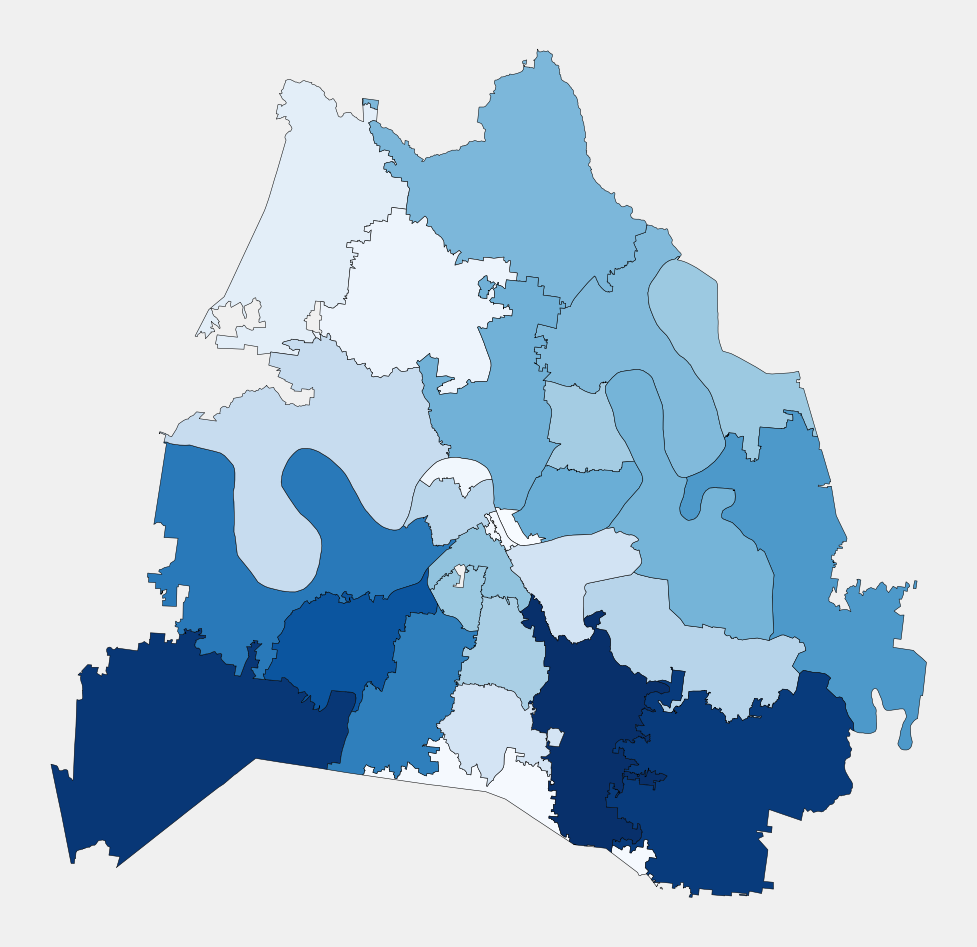

In [11]:
shot_zip_map = pd.merge(left = zipcodes, right = shots_by_zip, 
                    left_on = 'zip', right_on = 'ZIP')
fig, ax = plt.subplots(figsize=(16,16))
shot_zip_map.plot(column = 'count_given',
                  cmap=plt.cm.get_cmap('Blues'),
                  edgecolor = 'black',
                  ax = ax)
ax.axis('off');

In [ ]:
1. covid_count=covid_count.fillna(0) #this converts all null/NaNs to zero
2. Convert zip column to int: covid_count['Zip'] = covid_count['Zip'].astype(int)
covid_count.isnull().sum()


In [12]:
pd.read_csv('data/gender_age.csv')

,geoid,name,B01001001,"B01001001, Error",B01001002,"B01001002, Error",B01001003,"B01001003, Error",B01001004,"B01001004, Error",...,B01001045,"B01001045, Error",B01001046,"B01001046, Error",B01001047,"B01001047, Error",B01001048,"B01001048, Error",B01001049,"B01001049, Error"
0,86000US37013,37013,97939,2456,47658,1617,4550,514,3786,510,...,757,193,1019,240,571,208,315,130,233,82
1,86000US37015,37015,17665,734,9112,483,527,138,681,159,...,266,93,480,102,256,92,212,82,110,52
2,86000US37027,37027,56117,765,27888,915,1561,245,2093,283,...,892,145,1145,159,748,134,538,142,280,82
3,86000US37062,37062,12185,604,5990,361,232,81,349,94,...,191,63,197,54,217,92,106,50,50,26
4,86000US37064,37064,58937,1179,27951,724,1803,299,1838,302,...,731,122,1279,198,816,189,590,200,769,304
5,86000US37072,37072,31492,763,15327,585,881,203,1131,257,...,668,137,814,197,596,145,333,107,478,120
6,86000US37073,37073,14785,692,7373,379,440,132,697,204,...,149,51,339,104,290,94,120,53,130,94
7,86000US37075,37075,65986,866,31603,745,2188,278,2046,313,...,1018,165,1398,225,874,163,663,154,725,156
8,86000US37076,37076,40161,1183,19600,774,1457,309,1273,320,...,484,111,850,160,477,139,524,141,296,96
9,86000US37080,37080,7394,587,3703,327,175,83,110,78,...,192,65,135,58,115,58,64,38,81,45


In [13]:
pd.read_csv('data/gender_ed.csv')

,geoid,name,B15002001,"B15002001, Error",B15002002,"B15002002, Error",B15002003,"B15002003, Error",B15002004,"B15002004, Error",...,B15002031,"B15002031, Error",B15002032,"B15002032, Error",B15002033,"B15002033, Error",B15002034,"B15002034, Error",B15002035,"B15002035, Error"
0,86000US37010,37010,3247,429,1514,250,0,12,0,12,...,128,81,267,88,275,114,16,25,0,12
1,86000US37012,37012,1675,243,850,193,3,5,0,12,...,90,51,71,42,9,15,0,12,0,12
2,86000US37013,37013,62355,1417,29160,992,803,201,223,142,...,3278,478,8208,853,2961,549,657,279,197,96
3,86000US37014,37014,2012,267,1000,131,9,16,0,12,...,54,43,340,119,103,57,15,23,14,22
4,86000US37015,37015,12590,508,6195,320,41,36,15,19,...,534,125,761,183,278,94,68,38,45,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,86000US38552,38552,131,76,84,64,0,12,0,12,...,0,12,3,5,0,12,0,12,0,12
114,86000US38560,38560,1042,220,470,108,9,15,0,12,...,39,27,68,42,19,18,0,12,0,12
115,86000US38563,38563,2195,306,1028,175,0,12,0,12,...,42,33,128,94,90,59,0,12,0,12
116,86000US38567,38567,536,248,276,141,0,12,0,12,...,11,16,13,19,19,22,10,16,0,12


In [14]:
pd.read_csv('data/income.csv')

,B19001,Household Income in the Past 12 Months (In 2019 Inflation-adjusted Dollars),Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84
0,NaN,37013,NaN,37015,NaN,37027,NaN,37062,NaN,37064,...,37221,NaN,37228,NaN,37240,NaN,37243,NaN,37246,NaN
1,NaN,Value,Error,Value,Error,Value,Error,Value,Error,Value,...,Value,Error,Value,Error,Value,Error,Value,Error,Value,Error
2,Total:,35597,617,6673,279,19950,382,4040,188,21640,...,17959,354,1051,240,0,12,0,12,0,12
3,"Less than $10,000",1424,311,421,164,460,166,119,53,771,...,483,150,93,105,0,12,0,12,0,12
4,"$10,000 to $14,999",1023,239,256,101,173,94,122,54,302,...,408,144,59,61,0,12,0,12,0,12
5,"$15,000 to $19,999",1197,263,115,60,246,97,138,71,623,...,494,142,203,151,0,12,0,12,0,12
6,"$20,000 to $24,999",1751,399,415,147,250,95,140,59,512,...,481,147,68,75,0,12,0,12,0,12
7,"$25,000 to $29,999",1647,343,365,108,254,84,123,80,609,...,505,135,52,83,0,12,0,12,0,12
8,"$30,000 to $34,999",1685,323,452,135,250,95,124,63,630,...,605,177,131,122,0,12,0,12,0,12
9,"$35,000 to $39,999",1748,348,350,109,316,102,121,70,721,...,608,167,14,24,0,12,0,12,0,12


In [15]:
pd.read_csv('data/hisp.csv')

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",...,B03002017,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error"
0,86000US37010,37010,4966,647,4803,638,4502,664,245,170,...,20,75,0,12,53,65,0,12,53,65
1,86000US37012,37012,2185,338,2134,321,2050,321,73,75,...,0,12,0,12,4,9,0,12,4,9
2,86000US37013,37013,97939,2456,81131,2548,40080,1792,33280,2118,...,0,29,2464,757,608,315,357,221,251,222
3,86000US37014,37014,2835,382,2783,376,2682,374,18,28,...,0,12,0,12,12,19,12,19,0,12
4,86000US37015,37015,17665,734,16768,740,15842,746,304,115,...,0,19,221,114,39,39,37,39,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,86000US38552,38552,157,86,157,86,157,86,0,12,...,0,12,0,12,0,12,0,12,0,12
114,86000US38560,38560,1405,243,1405,243,1307,248,0,12,...,0,12,0,12,0,12,0,12,0,12
115,86000US38563,38563,3410,459,3410,459,3202,466,140,85,...,0,12,0,12,0,12,0,12,0,12
116,86000US38567,38567,685,288,660,291,615,286,0,12,...,0,12,0,12,25,45,25,45,0,12
